In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv("RAW_recipes.csv", engine='python', encoding='utf-8', error_bad_lines=False)
df.head()

<ipython-input-41-e5e6b5759392>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("RAW_recipes.csv", engine='python', encoding='utf-8', error_bad_lines=False)


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [48]:
dfc = df.copy()

In [50]:
all_ingredients = [word for sublist in dfc["ingredients"].str.strip("[]").str.replace("'", "").str.split(", ") for word in sublist]
ingredient_counts = pd.Series(all_ingredients).value_counts()
print(ingredient_counts)
#Salt, butter, sugar, onion, and water are the 5 most common ingredients

salt                                 85746
butter                               54975
sugar                                44535
onion                                39065
water                                34914
                                     ...  
fat-free cherry vanilla yogurt           1
baby banana puree                        1
vegetarian low-sodium baked beans        1
ginger peel                              1
nepitella                                1
Length: 14906, dtype: int64


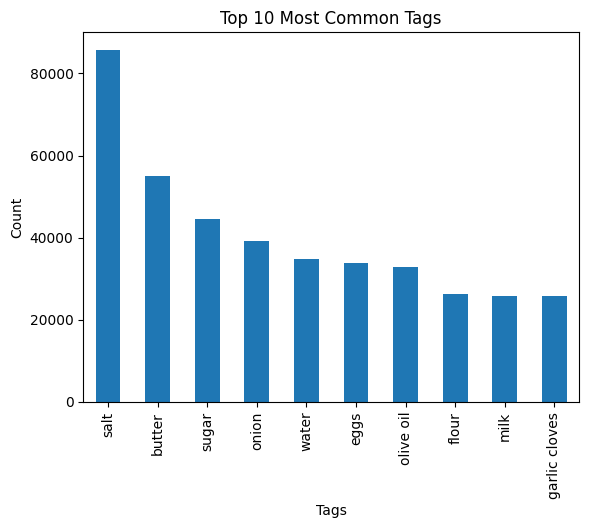

In [59]:
#Bar chart for 10 Most Common Ingredients
ingredient_counts.head(10).plot(kind='bar')
plt.xlabel('Ingredients')
plt.ylabel('Count')
plt.title('Top 10 Most Common Tags')
plt.show()

<ipython-input-52-f0228ff6adc0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfc.corr()
<ipython-input-52-f0228ff6adc0>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool))


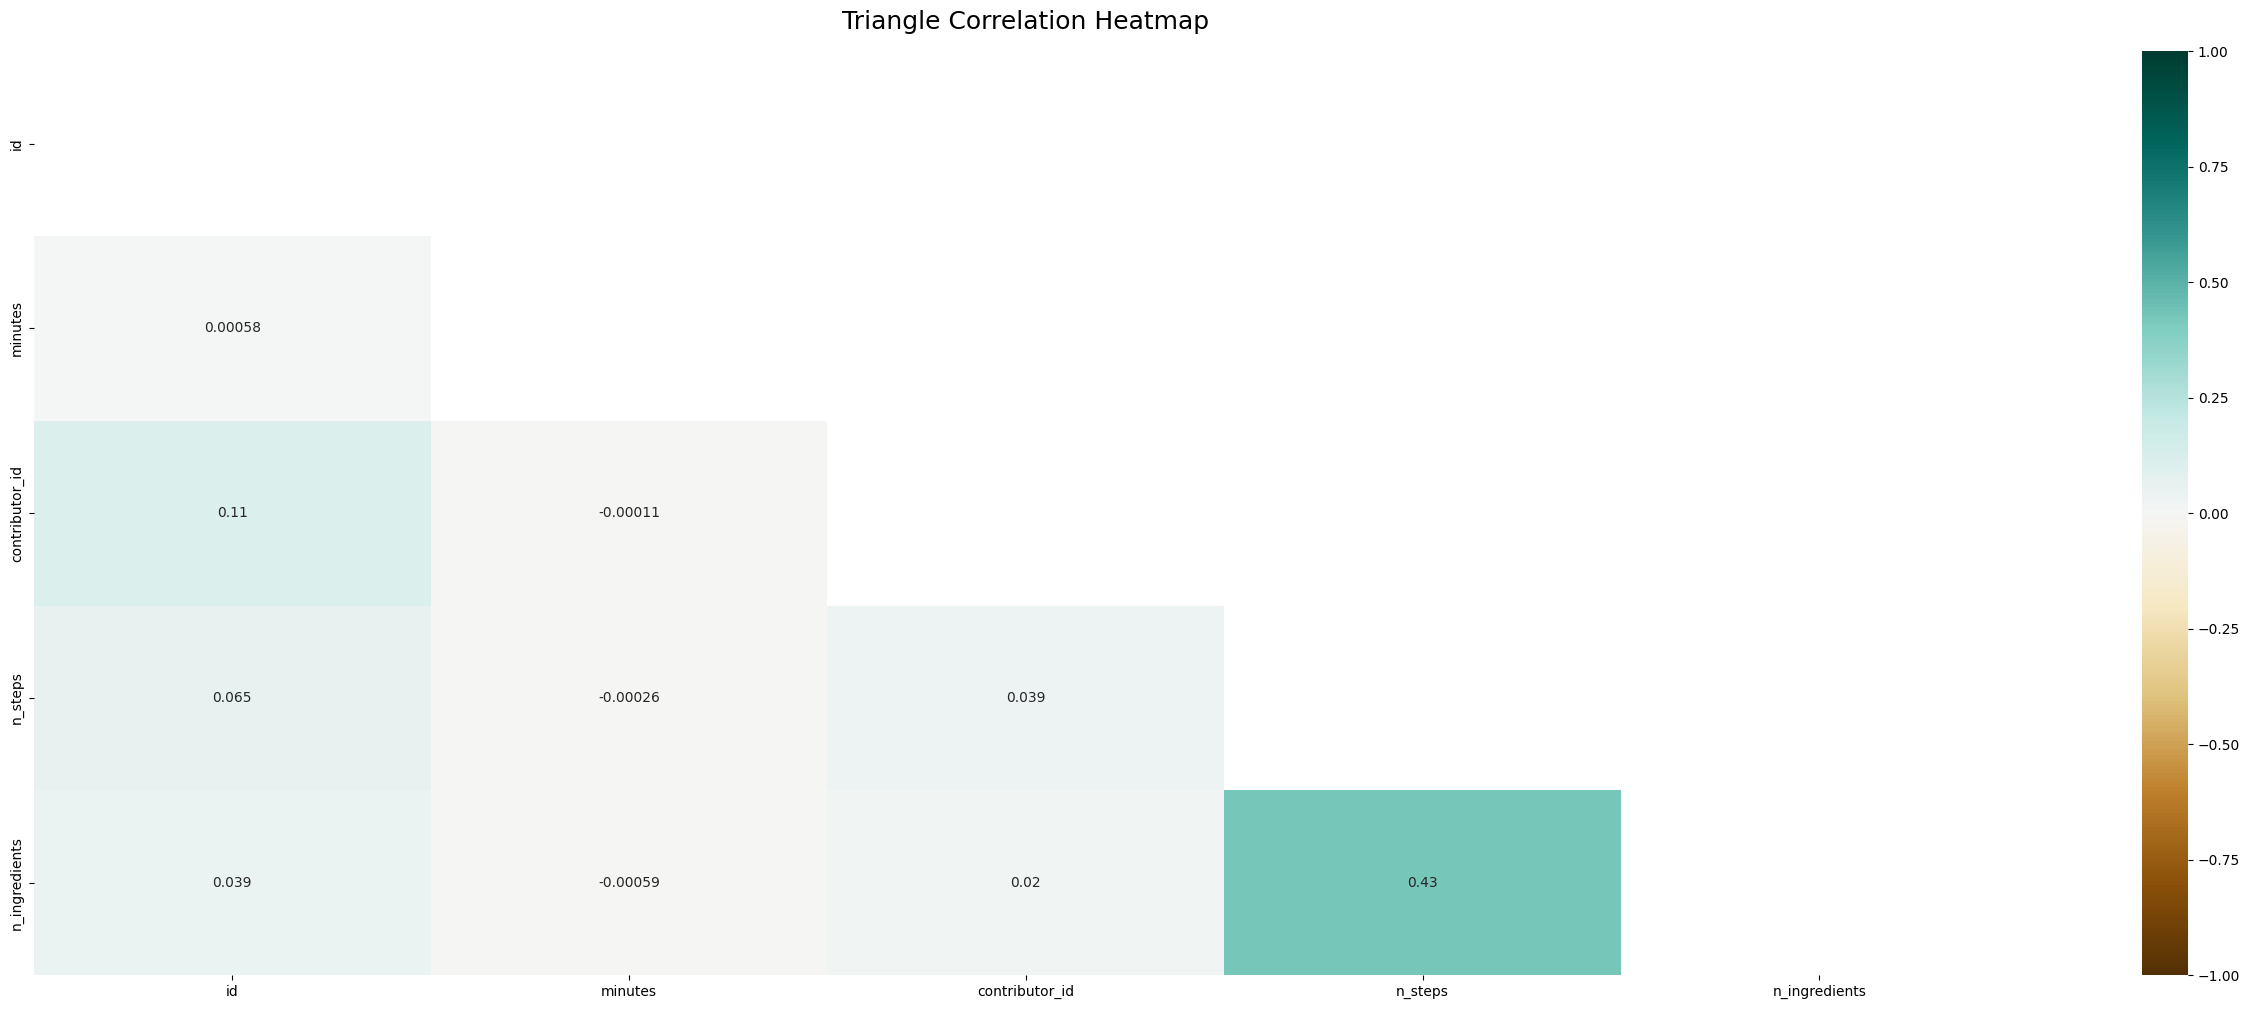

In [52]:
#Correlation matrix
plt.figure(figsize = (32,12))
corr_matrix = dfc.corr()
#Define the mask to set the values in the upper triangle to true
mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool))
heatmap = sns.heatmap(corr_matrix, mask = mask,
                      vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict = {'fontsize':18}, pad = 16);

#Suprisingly not much of a realtionship between #n_ingredients and minutes. Also surprising there is no relation between n_steps and minutes.

In [65]:
print(dfc['tags'].head())

0    [60-minutes-or-less, time-to-make, course, mai...
1    [30-minutes-or-less, time-to-make, course, mai...
2    [time-to-make, course, preparation, main-dish,...
3    [60-minutes-or-less, time-to-make, course, mai...
4    [weeknight, time-to-make, course, main-ingredi...
Name: tags, dtype: object


In [60]:
import ast

#Converting string reps of lists to actual lists
dfc['tags'] = dfc['tags'].apply(ast.literal_eval)

ValueError: ignored

In [61]:
#Creating a row for each entry within a tag
ex_dfc = dfc.explode('tags')

In [62]:
tag_counts = ex_dfc['tags'].value_counts()

In [63]:
print(tag_counts.head(10))

preparation         230546
time-to-make        225326
course              218148
main-ingredient     170446
dietary             165091
easy                126062
occasion            114145
cuisine              91165
low-in-something     85776
main-dish            71786
Name: tags, dtype: int64


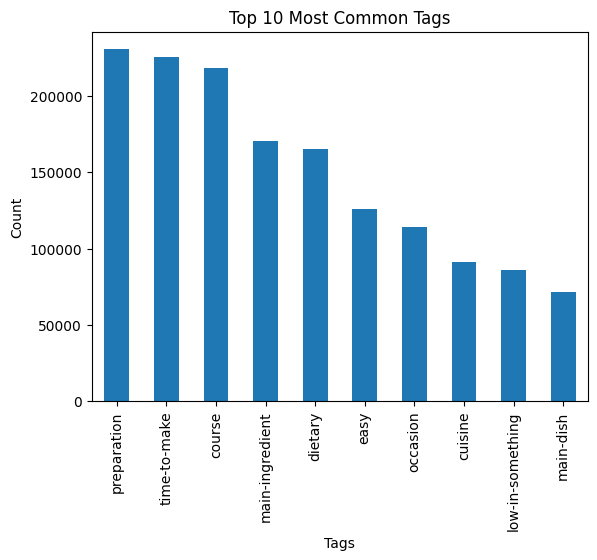

In [64]:
#Bar chart for 10 Most Common Tags
tag_counts.head(10).plot(kind='bar')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.title('Top 10 Most Common Tags')
plt.show()

In [66]:
#Just some general stats
dfc.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['minutes'].plot(kind='hist', bins=20, title='minutes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['contributor_id'].plot(kind='hist', bins=20, title='contributor_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['n_steps'].plot(kind='hist', bins=20, title='n_steps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='id', y='minutes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='minutes', y='contributor_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='contributor_id', y='n_steps', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='n_steps', y='n_ingredients', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['minutes'].plot(kind='line', figsize=(8, 4), title='minutes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['contributor_id'].plot(kind='line', figsize=(8, 4), title='contributor_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['n_steps'].plot(kind='line', figsize=(8, 4), title='n_steps')
plt.gca().spines[['top', 'right']].set_visible(False)